# ~ PoC AI Pool 2025 ~
- ## Day 2: Neural Networks from Scratch
    - ### Module 2: Neural Networks
-----------

During this notebook you will see concept that you already see in the previous notebook ! They are just here to remind you and to show how are they apply to neural networks... good luck !

In [ ]:
#import the libraries

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Now let's go deeper in the machine learning by talking about neural networks, 
Neural networks are just a bunch of layer filled of neurons that are linked together.

There are using the same approach of the machine learning like you do before but here you will use matrices to process multiples calculs.

did you remember the following formula for process multiple neurons ? 

$$ y = W_1 \cdot x_1 + W_2 \cdot x_2 + b $$

it is what are performs in neural network but with a lot of neurons !

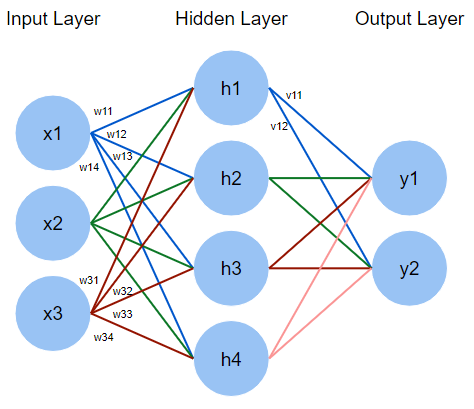

This notebook is axed especially in the maths behind the neural network so good luck to everyone !


## Step 1 Be a neural network...

for this first task you will do the same work as a neural network will do to learn from an output. *(we remove the bias to simplify your calculation :)*)

imagine you have 4 neurons in input and 4 other neurons in output, these neurons can be see as two layers of each 4 neurons, these layers can be represented as two numpy matrices with shape of (4,1).

In a neural network all the neurons of a layers are connected to the other like you already know

if you have to predict the value of a neuron called $y1$ it will be : 

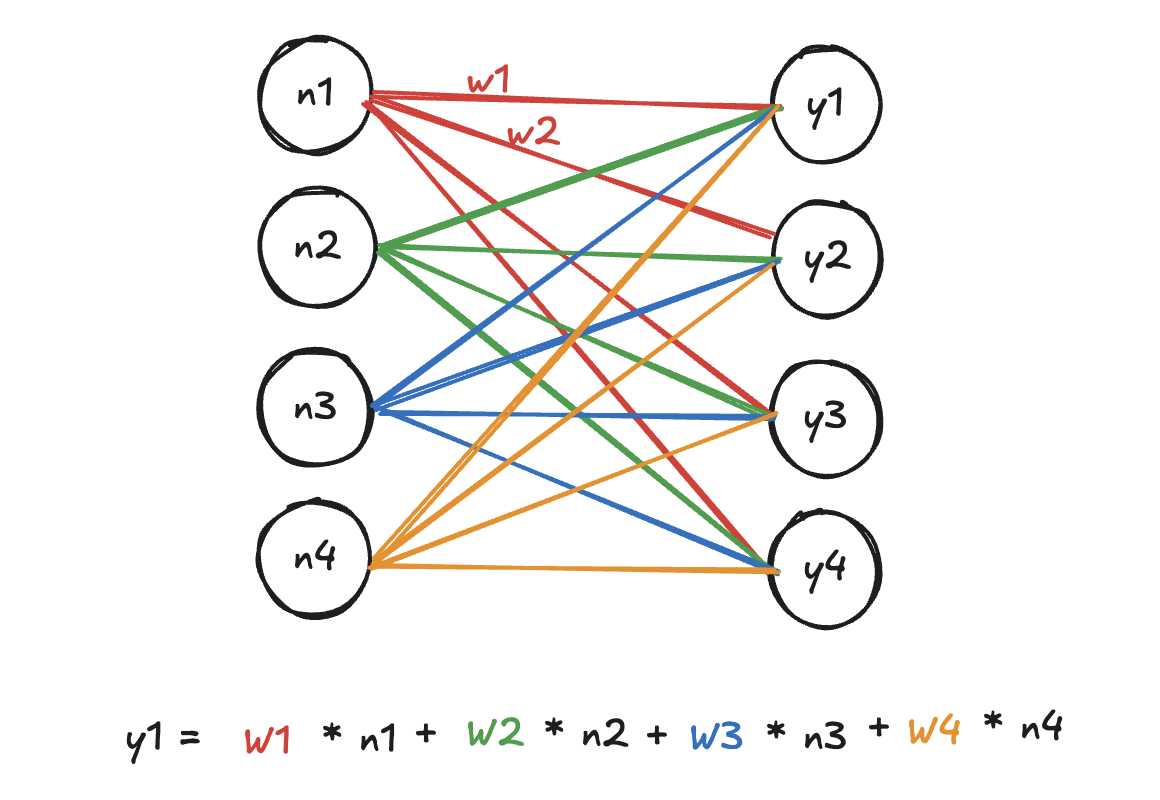

your goal here is to create to matrices each with 4 neurons with respective values : 

- [0, 1, 0, 1]
- [1, 0, 1, 0]

and to calcul with your *intelligence* all the respective weight to get the second matrices.

we can set the representation like this : 


$$
y1 = \begin{pmatrix} 0_{a} & 1_{b} & 0_{c} & 1_{d} \end{pmatrix} \times \begin{pmatrix}
w_{a1} & w_{a2} & w_{a3} & w_{a4} \\
w_{b1} & w_{b2} & w_{b3} & w_{b4} \\
w_{c1} & w_{c2} & w_{c3} & w_{c4} \\
w_{d1} & w_{d2} & w_{d3} & w_{d4}
\end{pmatrix} = \begin{pmatrix} 1 & 0 & 1 & 0 \end{pmatrix}
$$

Don't hesitate to check the [NumPy Documentation](https://numpy.org/doc/stable/) if needed.


In [ ]:
# TODO: Create the two matrix
N_neurons = np.array([[0, 1, 0, 1]])
Y_neurons = np.array([[1, 0, 1, 0]])


# TODO: Complete the matrix W
W_weight = np.array([
    [0, 1, 0, 0]
    [0, 0, 0, 0]
    [0, 1, 0, 0]
    [0, 0, 0, 0]
])

Y_pred = N_neurons @ W_weight # the @ operator is used for matrix multiplication

print("Result after multiplication :")
print(Y_pred ,"vs", Y_neurons)

assert np.array_equal(Y_pred, Y_neurons), "Output matrices doesn't not correspond to what we want"

What you just did here is exactly what a model does during the backpropagation pass (you will see after)! The model repeatedly adjusts its weights to better fit the data, just as you did. Keep in mind that this is how the model updates his parameters to learn over time.

___
## Step 2 concept 

## 1. Data Preparation

**Dataset Overview**

*The Iris dataset is a classic in machine learning—like the “Hello, World!” for ML.
It has 150 samples of flowers, each sample with 4 features:*

- Sepal length
- Sepal width
- Petal length
- Petal width

*There are 3 classes (species of Iris):*

- Iris Setosa (Class 0)
- Iris Versicolor (Class 1)
- Iris Virginica (Class 2)


### 1.1 Import the data 

You need to import the data in two different dataset call train and test, respectivly for training the model and testing it with data that he never seen.

### 1.2 Normalization

Each feature (sepal length, sepal width, etc.) can range over different numeric values. For example, sepal length can vary between roughly 1 cm and 8 cm. To make the training more stable (and keep our brain from exploding with large numbers!), we often normalize or standardize these features:

An simple demo, if we have a sepal lenght equal to 4 and all the value are between 1 and 8 if we normalise into the range $[0,1]$. Think of it like converting percentages, it becomes about 0.5 (or 50%)

Normalization typically scales each feature into something like [0,1].
Standardization transforms each feature to have mean 0 and standard deviation 1.

For simplicity, let’s do a quick normalization to [0, 1] by dividing by the maximum value (or you can also do min-max). That makes everything neat and tidy for the network.

In [ ]:
# 1) Load the dataset
iris = load_iris()
X = iris.data  # shape (150, 4)
y = iris.target  # shape (150,)

# TODO: 2) Normalize (simple min-max, for example)
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)  # scale each column to [0, 1]

# 3) Split into train/test for a bit of realism
train_inputs, test_inputs, train_results, test_results = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# TODO: 4) Print the shapes
print("Train inputs shape:", train_inputs.shape)
print("Test inputs shape:", test_inputs.shape)
print("Train results shape:", train_results.shape)
print("Test results shape:", test_results.shape)

# TODO: print an example
print("-"*40)
print("First training sample:", train_inputs[0])
print("Its label:", train_results[0])


## 2. Model Architecture

### 2.1 The Building Blocks

A neural network is made of layers. Each layer performs a simple math operation on its inputs.

### Layers and Their Components

1. **Input Layer:**
    - **What it does:** Simply receives the data.
    - **Our case:** we have 4 features as input
2. **Hidden Layer (or layers):**
    - **Layer size :** Let’s pick, for example, 8 neurons in one hidden layer—just because we can.
    - **What it does:** Performs a mathematical transformation using *weights* and *biases*.
    - **Weights (W):** Numbers that multiply each input. Think of them as “importance factors.”
    - **Biases (b):** Numbers that get added to the result, helping the network adjust its output.
3. **Output Layer:**
    - **What it does:** Produces a score for each possibilties (3). Then, we use the softmax function to turn these scores into probabilities.

### A Simple Example

Imagine you have an input vector XX with 2 numbers:

$$X = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$$

And you have one neuron (a simple unit) that computes an output using:

$$Z=W⋅X+b$$

If W is $[0.1,0.2]$ and $b=0.5$, then the calculation is:

$$Z = 0.1 \times 2 + 0.2 \times 3 + 0.5 = 0.2 + 0.6 + 0.5 = 1.3$$

This is the basic math performed in each neuron.

### 2.2 Our Network Design

We will build a network with:

- **Hidden Layer:** 8 neurons with ReLU activation.
- **Output Layer:** 3 neurons with softmax activation.

You might wonder, “Why 8 in the hidden layer?” Because 7 would be too few, and 9 might make the universe collapse (just kidding!). There’s no magical reason—just a decent small size for a simple dataset. *But think that use mutliple of two between layer make the calcul more efficient*.



### Parameter Initialization

We start by randomly initializing the weights (small random numbers) and setting the biases to zero.

In [ ]:
np.random.seed(42)  # Set a random seed for reproducibility

# TODO: Define dimensions
input_dim = 4        # 4 for the Iris dataset
hidden_dim = 8       # Number of neurons in the hidden layer
output_dim = 3       # 3 classes in the output layer

# TODO: Initialize weights and biases
W1 = np.random.rand(hidden_dim, input_dim)       # Shape: (hidden_dim, input_dim)
b1 = np.ones((hidden_dim, 1))       # Shape: (hidden_dim, 1)

W2 = np.random.rand(output_dim, hidden_dim)      # Shape: (output_dim, hidden_dim)
b2 = np.ones((output_dim, 1))       # Shape: (output_dim, 1)

assert W1.sum() < 13.94 and W1.sum() > 13.93 , "W1 not well initialized" 
assert b1.sum() == 8 , "b1 not well initialized"
assert W2.sum() < 13.46 and W2.sum() > 13.45 , "W2 not well initialized"
assert b2.sum() == 3 , "b2 not well initialized"

# TODO: Print the shapes and the matrices of W1, b1, W2, and b2 to ensure they match the expected dimensions.
print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)

## 3. Forward Pass

### 3.1 What Is a Forward Pass?

A forward pass means sending the input through the network to get an output. It consists of:

1. **Calculating the linear transformation:**

    $$Z = W \cdot X + b$$

2. **Applying an activation function:**
    - **ReLU:** Sets negative numbers to 0.
    - **Softmax:** Converts raw scores into probabilities.

### 3.2 Detailed Steps and Examples

### Hidden Layer Computation

1. **Linear Transformation:**

    For the hidden layer, we compute:

    $$Z^{(1)} = W^{(1)} \cdot X + b^{(1)}$$

    Here, $X$ is the 4×1 vector, $W^{(1)}$ is 4×8, and $b^{(1)}$ is 8×1.

    The result $Z^{(1)}$ is a 8×1 vector (one value per neuron).

2. **ReLU Activation:**

    ReLU is defined as:

    $$\text{ReLU}(z) = \max(0, z)$$

    For each number in $Z^{(1)}$, if it’s negative, we set it to 0; if it’s positive, we leave it as is.


### Output Layer Computation

1. **Linear Transformation:**

    Next, for the output layer:

    $Z^{(2)} = W^{(2)} \cdot A^{(1)} + b^{(2)}$

    where $A^{(1)}$ is the output of the hidden layer (after applying ReLU).

2. **Softmax Activation:**

    Softmax turns the 3 scores in $Z^{(2)}$ into probabilities:

    $Y\hat{Y}_j = \frac{e^{Z^{(2)}_j}}{\sum_{k=1}^{3} e^{Z^{(2)}_k}}$

    This ensures that all 3 probabilities add up to 1.

In [ ]:
#TODO: implement the relu function
def relu(z):
    return np.maximum(0, z)

#TODO: implement the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

def forward_pass(X, W1, b1, W2, b2):
    """
    Perform the forward pass through the network.
    Input:
      - X: A column vector of shape (4, 1)
    Returns:
      - A1: Activations from the hidden layer.
      - A2: Output probabilities from the output layer.
    """
    X = X.reshape(-1, 1)  # Reshape to a column vector if needed.

    # Hidden layer computation:
    Z1 = np.dot(W1, X) + b1  # This performs the linear combination.
    # TODO: Apply the ReLU function to Z1 to get A1.
    A1 = relu(Z1)

    # Output layer computation:
    Z2 = np.dot(W2, A1) + b2  # Linear combination for the output.
    # TODO: Apply the softmax function to Z2 to get A2.
    A2 = softmax(Z2)

    return Z1, A1, A2

# Example: Run a forward pass for the first training sample.
Z1_example, A1_example, A2_example = forward_pass(train_inputs[0], W1, b1, W2, b2)

# TODO: Print the hidden layer's pre-activation (Z1) and post-activation (A1) and (A2) values.
print("Z1 (pre-activation hidden):", Z1_example.T)
print("A1 (post-activation hidden):", A1_example.T)
print("A2 (output probabilities):", A2_example.T)
print("Sum of A2:", A2_example.sum())

## 4. Loss Function

### 4.1 What Is the Loss Function?

The loss function tells you how "wrong" your network's prediction is compared to the true label. For classification, we use **cross-entropy loss**.

### 4.2 Explaining Cross-Entropy Loss

Suppose your network produces a probability for each class. For a given sample:

- Let  be the output probabilities.

    $\hat{y} = [\hat{y}_1, \hat{y}_2, \dots, \hat{y}_{10}]$

- The true label is, say, class $c$. In one-hot encoding, the correct answer is represented as a vector with a 1 at position $c$ and 0s elsewhere.

- Here is an example of a representation of a one-hot encoding data :

    ![One_Hot_encoding .png](<attachment:One_Hot_encoding .png>)

The cross-entropy loss is defined as:

$L = -\log(\hat{y}_c)$

This means if your network assigns a high probability to the correct class (close to 1), the loss will be small (since log⁡(1)=0\log(1) = 0). But if the probability is low, the loss is high.

### A Simple Example

If the correct class is 3 and the network outputs:

$\hat{y} = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.05 \\ 0.6 \\ 0.02 \\ 0.01 \\ 0.005 \\ 0.005 \\ 0.005 \\ 0.005 \end{bmatrix}$

Then:

$L = -\log(0.6) \approx 0.51$
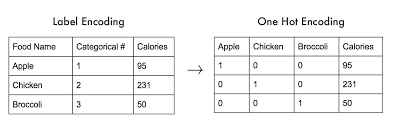

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss for one sample.
    Input:
      - y_true: The true label as an integer (0-9).
      - y_pred: The predicted probabilities as a numpy array of shape (10, 1).
    Returns:
      - A scalar representing the loss.
    """
    epsilon = 1e-12  # To avoid log(0)
    # TODO: implement cross-entropy loss computation.
    loss = -np.log(y_pred[y_true] + epsilon)
    return loss

# Example test:
dummy_pred = np.array([[0.1], [0.2], [0.05], [0.6], [0.02], [0.01], [0.005], [0.005], [0.005], [0.005]])
dummy_label = 3  # The correct class is 3

# TODO: Compute and print the loss for dummy_pred.
loss_example = cross_entropy_loss(dummy_label, dummy_pred)
print("Cross-entropy loss:", loss_example)

## 5. Backward Pass (Backpropagation)

### 5.1 What Is Backpropagation?

Backpropagation is the process of figuring out how to adjust the weights and biases to make the network’s predictions closer to the truth. It does this by computing **gradients** (which are like slopes in calculus) that tell us which direction to move our parameters.

### The Chain Rule (In Simple Terms)

If you have a function inside another function, the chain rule tells you how changes in the inner function affect the outer function.

- For example, if , then:

    $L = f(g(x))$

    $\frac{dL}{dx} = \frac{df}{dg} \times \frac{dg}{dx}$

In our network, the loss LL depends on the outputs, which in turn depend on the weights. We use the chain rule to “chain” these derivatives together.

### 5.2 Backpropagation in Our Network

### Output Layer Gradients

For the output layer with softmax, it can be shown that:

$\frac{\partial L}{\partial Z^{(2)}} = \hat{y} - Y$

where:

- $\hat{y}$ is the predicted probability vector,
- $Y$ is the one-hot encoded true label.

For the weights in the output layer:

$\frac{\partial L}{\partial W^{(2)}} = (\hat{y} - Y) \cdot A^{(1)^T}$

And for the biases:

$\frac{\partial L}{\partial b^{(2)}} = \hat{y} - Y$

### Hidden Layer Gradients

For the hidden layer, we first compute how the loss changes with respect to the hidden activations. Then, since we used ReLU, we multiply by the derivative of ReLU:

$\text{ReLU}'(z) =
\begin{cases}
1, & \text{if } z > 0 \\
0, & \text{otherwise}
\end{cases}$

Thus:

$\frac{\partial L}{\partial Z^{(1)}} = \left( W^{(2)^T} \cdot \frac{\partial L}{\partial Z^{(2)}} \right) \circ \mathbf{1}_{\{Z^{(1)} > 0\}}$

where $\circ$ means element-wise multiplication.

In [ ]:
def backward_pass(X, Z1, A1, A2, y_true, W1, W2):
    """
    Compute the gradients for one training sample.
    Inputs:
      - X:      Input vector (4, 1)
      - Z1:     Pre-activation of hidden layer (8, 1)  => i.e. W1@X + b1
      - A1:     Activation (ReLU) of hidden layer (8, 1)
      - A2:     Output probabilities (3, 1) [= softmax(W2@A1 + b2)]
      - y_true: The true label as an integer (0, 1, or 2)
      - W1:     Weights of hidden layer (8, 4)
      - W2:     Weights of output layer (3, 8)
    Returns:
      - dW1, db1, dW2, db2 (gradients, same shapes as W1, b1, W2, b2)
    """
    # Ensure X is a column vector
    X = X.reshape(-1, 1)  # Shape (4, 1)

    # 1) One-hot encode the true label
    Y = np.zeros_like(A2)
    Y[y_true] = 1.0

    # 2) Gradient wrt Z2 (output layer pre-activation)
    dZ2 = A2 - Y  # Shape (3, 1)

    # TODO: 3) Gradients for the output layer
    # Compute dW2 as the outer product of dZ2 and the transpose of A1.
    dW2 = np.dot(dZ2, A1.T)  # Shape (3, 8)
    db2 = dZ2  # Shape (3, 1)

    # 4) Backpropagate to the hidden layer
    # dA1 is the gradient coming back from the output layer:
    dA1 = np.dot(W2.T, dZ2)  # Shape (8, 1)

    # TODO: Derivative of ReLU
    dZ1 = np.dot(W2.T, dZ2) # Shape (8, 1)

    # TODO: 5) Gradients for the hidden layer
    # Compute dW1 as the outer product of dZ1 and the transpose of X.
    dW1 = np.dot(dZ1, X.T)  # Shape (8, 4)
    db1 = dZ1  # Shape (8, 1)

    return dW1, db1, dW2, db2


# Example: Run a backward pass for the first training sample.
dW1_example, db1_example, dW2_example, db2_example = backward_pass(train_inputs[0], Z1_example, A1_example, A2_example, train_results[0], W1, W2)
print("dW1_example:", dW1_example)
print("db1_example:", db1_example)
print("dW2_example:", dW2_example)
print("db2_example:", db2_example)

## 6. Optimization

### 6.1 Gradient Descent

Once we have the gradients (the slopes), we update our parameters by taking a small step in the opposite direction of the gradient. This is the gradient descent update rule:

$\theta := \theta - \eta \cdot \frac{\partial L}{\partial \theta}$

- $\theta$ represents a weight or bias.
- $\eta$ is the learning rate (think of it as the step size).

In [ ]:

#TODO: define hyperparameters
epochs = 100      # How many times to go through the training data
learning_rate = 0.1

size = len(train_inputs)

#TODO: Implement the update_parameters function
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    """
    Update the parameters using the gradients.
    """
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2


for epoch in range(epochs):
    epoch_loss = 0
    for i in range(size):
        # Get one training sample and its label
        X = train_inputs[i].reshape(-1, 1)  # force reshape (4,) to (4, 1) to avoid error
        y = train_results[i]

        # Forward pass: compute activations
        Z1, A1, A2 = forward_pass(X, W1, b1, W2, b2)

        # Compute the loss for this sample
        loss = cross_entropy_loss(y, A2)
        epoch_loss += loss

        # Backward pass: compute gradients
        dW1, db1, dW2, db2 = backward_pass(X, Z1, A1, A2, y, W1, W2)

        # Update parameters using gradient descent
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    # Print the average loss for this epoch.
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / size}")

print("Training complete!")

---

Well done if you are here You finish this day bravo !

if you want to go deeper again, you can try to add more layers into your neural network or try to play with another dataset like the mnist... :)
to load the mnist dataset you can see [here](https://gist.github.com/alperyeg/ca5e5e9b5ffb442a9ce5caca7c8399c1)